https://www.data.gouv.fr/fr/datasets/frequentation-des-monuments-nationaux/

In [1]:
import csv

FILENAME = "/home/sch-bm/Téléchargements/frequentation-des-monuments-nationaux.csv"
MONUMENT = "Tours et remparts d'Aigues-Mortes"

with open(FILENAME, encoding="utf-8-sig") as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    print(f.readline())
    f.seek(0)
    reader = csv.DictReader(f, dialect=dialect)
    print(next(reader))
    data = {int(d["Année"]): d["Total"] for d in reader if d["Nom de l'établissement"] == MONUMENT}
    print(data)


Année;Région;Code Insee région;Département;Code Insee commune;Libellé géographique commune;Nom de l'établissement;Gratuit;Payant;Total;Code Insee département

{'Année': '2019', 'Région': 'Centre-Val de loire', 'Code Insee région': '24', 'Département': 'Cher', 'Code Insee commune': '18033', 'Libellé géographique commune': 'Bourges', "Nom de l'établissement": 'Palais Jacques Cœur', 'Gratuit': '16200.0', 'Payant': '35230.0', 'Total': '51420.0', 'Code Insee département': '18'}
{2020: '110920.0', 2021: '145940.0', 2022: '209640.0', 2019: '191600.0'}


In [2]:
import csv

FILENAME = "/home/sch-bm/Téléchargements/frequentation-des-monuments-nationaux.csv"
MONUMENT = "Tours et remparts d'Aigues-Mortes"

with open(FILENAME, encoding="utf-8") as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    reader = csv.DictReader(f, dialect=dialect)
    data = {
        int(d["\ufeffAnnée"]): {
            "gratuit": d["Gratuit"],
            "payant": d["Payant"],
            "total": d["Total"],
        }
        for d in reader
        if d["Nom de l'établissement"] == MONUMENT
    }

data

{2020: {'gratuit': '48350.0', 'payant': '62570.0', 'total': '110920.0'},
 2021: {'gratuit': '57500.0', 'payant': '88440.0', 'total': '145940.0'},
 2022: {'gratuit': '85560.0', 'payant': '124080.0', 'total': '209640.0'},
 2019: {'gratuit': '79560.0', 'payant': '112040.0', 'total': '191600.0'}}

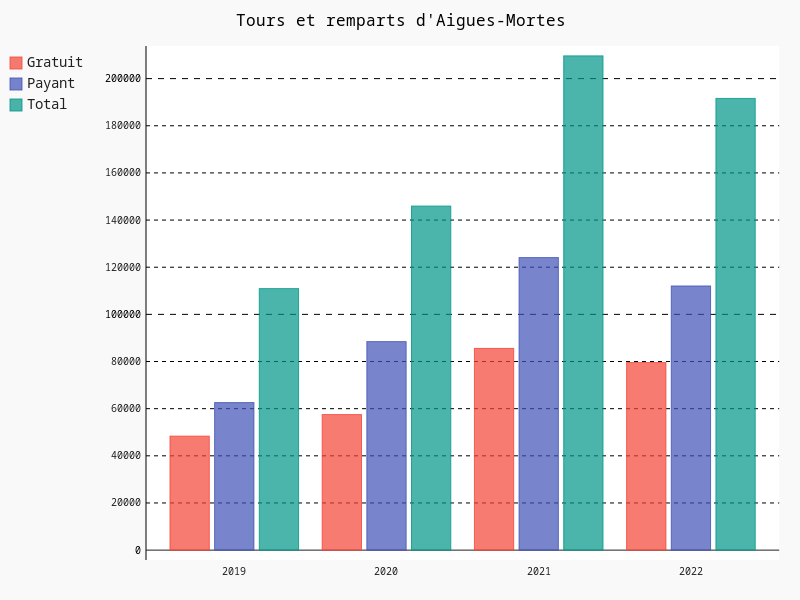

In [3]:
FILENAME = "/home/sch-bm/Téléchargements/frequentation-des-monuments-nationaux.csv"
MONUMENT = "Tours et remparts d'Aigues-Mortes"
KEYS = ["Gratuit", "Payant", "Total"]

with open(FILENAME, encoding="utf-8") as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    reader = csv.DictReader(f, dialect=dialect)
    data = {
        d["\ufeffAnnée"]: {key: int(d[key].split(".")[0]) for key in KEYS}
        for d in reader
        if d["Nom de l'établissement"] == MONUMENT
    }

import pygal
bar_chart = pygal.Bar()
bar_chart.title = MONUMENT
bar_chart.x_labels = sorted(data.keys())
for key in KEYS:
    bar_chart.add(key, [d[key] for d in data.values()])
bar_chart

In [4]:
FILENAME = "/home/sch-bm/Téléchargements/frequentation-des-monuments-nationaux.csv"
MONUMENT = "Tours et remparts d'Aigues-Mortes"
KEYS = ["Gratuit", "Payant", "Total"]

def graph_monument(monument):
    with open(FILENAME, encoding="utf-8-sig") as f:
        dialect = csv.Sniffer().sniff(f.read())
        f.seek(0)
        reader = csv.DictReader(f, dialect=dialect)
        data = {
            d["Année"]: {key: int(d[key].split(".")[0]) for key in KEYS}
            for d in reader
            if d["Nom de l'établissement"] == monument
        }
    
    bar_chart = pygal.Bar()
    bar_chart.title = monument
    bar_chart.x_labels = sorted(data.keys())
    for key in KEYS:
        bar_chart.add(key, [d[key] for d in data.values()])
    return bar_chart

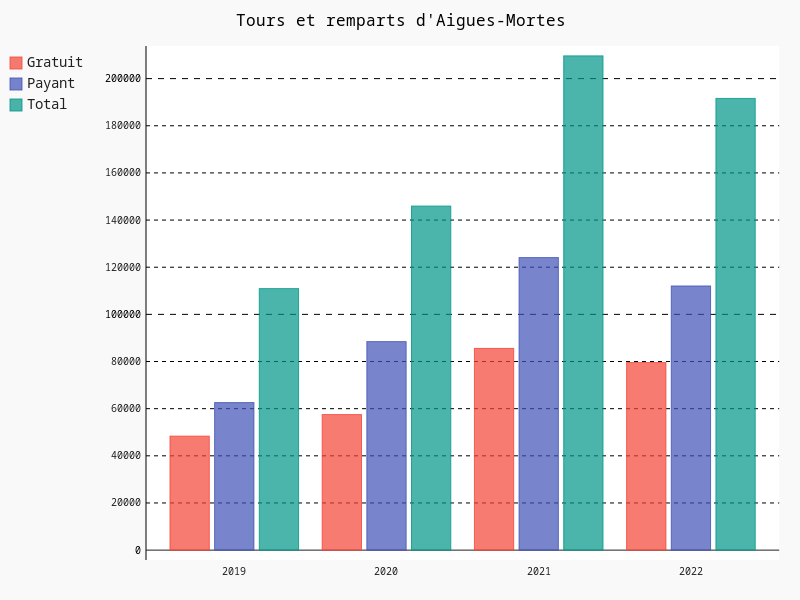

In [5]:
graph_monument(MONUMENT)

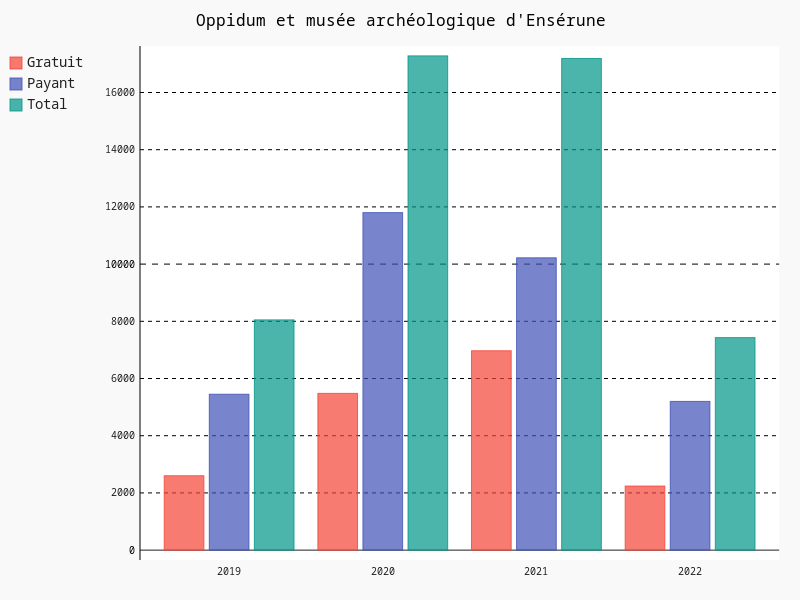

In [6]:
graph_monument("Oppidum et musée archéologique d'Ensérune")

In [58]:
import operator

with open(FILENAME, encoding="utf-8") as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    reader = csv.DictReader(f, dialect=dialect)
    data = dict(sorted((((d["\ufeffAnnée"], d["Nom de l'établissement"]), int(d["Total"].split(".")[0])) for d in reader), key=operator.itemgetter(1), reverse=True)[:10])

In [59]:
data

{('2022', 'Arc de Triomphe'): 1754750,
 ('2019', 'Arc de Triomphe'): 1606710,
 ('2019', 'Abbaye du Mont-Saint-Michel'): 1479290,
 ('2019', 'Sainte-Chapelle du Palais'): 1375610,
 ('2022', 'Abbaye du Mont-Saint-Michel'): 1285610,
 ('2022', 'Sainte-Chapelle du Palais'): 1201620,
 ('2019', 'Domaine national de Chambord'): 1130850,
 ('2022', 'Domaine national de Chambord'): 1053950,
 ('2022', 'Panthéon'): 949760,
 ('2019', 'Panthéon'): 875670}

In [69]:
with open(FILENAME, encoding="utf-8") as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    reader = csv.DictReader(f, dialect=dialect)
    data = dict(
        sorted(
            (
                (
                    (
                        d["\ufeffAnnée"],
                        d["Nom de l'établissement"]
                    ),
                    int(d["Total"].split(".")[0])
                )
                for d in reader
            ),
            key=operator.itemgetter(1),
            reverse=True
        )[:10]
    )

In [70]:
data

{('2022', 'Arc de Triomphe'): 1754750,
 ('2019', 'Arc de Triomphe'): 1606710,
 ('2019', 'Abbaye du Mont-Saint-Michel'): 1479290,
 ('2019', 'Sainte-Chapelle du Palais'): 1375610,
 ('2022', 'Abbaye du Mont-Saint-Michel'): 1285610,
 ('2022', 'Sainte-Chapelle du Palais'): 1201620,
 ('2019', 'Domaine national de Chambord'): 1130850,
 ('2022', 'Domaine national de Chambord'): 1053950,
 ('2022', 'Panthéon'): 949760,
 ('2019', 'Panthéon'): 875670}

In [7]:
from enum import Enum

class Test(Enum):
    UN = 1
    DEUX = 2

    @property
    def test(self) -> str:
        return str(self.value)

Test.UN.test

'1'